# Data Cleanup - Tweet Dataset (Darija)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NouamaneTazi/hackai-challenges/blob/main/new_notebooks/data_cleanup_tweet_dataset_darija.ipynb)

## 📚 Quick Glossary
- **Dataset**: A collection of data (in our case, tweets)
- **Preprocessing**: Cleaning and preparing data for analysis
- **Tokenization**: Breaking text into individual words
- **Stop Words**: Common words that don't add much meaning (like "the", "and")
- **N-grams**: Groups of n words that appear together

## ⏱️ Time Estimate
- Part 1 (Data Cleaning): 30 minutes
- Part 2 (Analysis): 30 minutes

## 🎯 Learning Objectives
By the end of this notebook, you will:
1. Learn how to clean text data
2. Understand basic text preprocessing steps
3. Create visualizations of text data
4. Analyze word patterns in Darija tweets

📌 Challenge Description:

In this challenge, you will clean a tweet dataset from Hugging Face (`shmuhammad/AfriSenti-twitter-sentiment`), focusing on the Moroccan Darija subset. The goal is to preprocess the text data by removing emojis, usernames, and applying custom list of Darija stop words. The cleaned data will then be ready for n-gram analysis.

📊 Dataset Summary:
AfriSenti is the largest sentiment analysis dataset for under-represented African languages, covering 110,000+ annotated tweets in 14 African languages (Amharic, Algerian Arabic, Hausa, Igbo, Kinyarwanda, Moroccan Arabic, Mozambican Portuguese, Nigerian Pidgin, Oromo, Swahili, Tigrinya, Twi, Xitsonga, and Yoruba).

## 🛠️ Setup
First, let's install and import the necessary tools. Run this cell to get started!

In [ ]:
# Install required packages
import sys
import subprocess

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install required packages
required_packages = [
    "datasets",
    "pandas",
    "regex",
    "nltk",
    "matplotlib",
    "seaborn",
    "wordcloud",
    "arabic-reshaper",
    "python-bidi"
]

for package in required_packages:
    install_package(package)

In [1]:
# Import libraries
from datasets import load_dataset
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from tqdm.notebook import tqdm  # For progress bars

# Download required NLTK data
nltk.download('punkt')

# Set display options
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Part 1: Data Cleaning (30 minutes)

In this section, we'll clean our tweet data by:
1. Loading the dataset
2. Removing emojis
3. Removing usernames
4. Removing Latin characters
5. Removing punctuation
6. Tokenizing the text
7. Removing stop words

📌 Challenge Description:

In this challenge, you will clean a tweet dataset from Hugging Face (`shmuhammad/AfriSenti-twitter-sentiment`), focusing on the Moroccan Darija subset. The goal is to preprocess the text data by removing emojis, usernames, and applying custom list of Darija stop words. The cleaned data will then be ready for n-gram analysis.

📊 Dataset Summary:
AfriSenti is the largest sentiment analysis dataset for under-represented African languages, covering 110,000+ annotated tweets in 14 African languages (Amharic, Algerian Arabic, Hausa, Igbo, Kinyarwanda, Moroccan Arabic, Mozambican Portuguese, Nigerian Pidgin, Oromo, Swahili, Tigrinya, Twi, Xitsonga, and Yoruba).

# Part 1: Data Cleaning

In [4]:
#Installing Necessary Packages
!pip install -U datasets pandas regex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 

In [2]:
#Import Necessary Packages
from  datasets  import load_dataset
import pandas as pd
import re
pd.set_option('display.max_colwidth', None)

## 1. Loading the Dataset
Let's load our Darija tweets dataset from Hugging Face. This dataset contains tweets in Moroccan Arabic (Darija).

In [3]:
"""
Load the `shmuhammad/AfriSenti-twitter-sentiment` dataset from the Hugging Face `datasets` library, and specify the "arq" subset for Moroccan Darija.
"""
print("Loading dataset...")
darija_dataset = load_dataset("shmuhammad/AfriSenti-twitter-sentiment", "arq")

# Convert to pandas DataFrame for easier manipulation
print("Converting to DataFrame...")
darija_dataset_df = pd.DataFrame(darija_dataset['train'])

# Show the first few tweets
print("\nFirst 5 tweets in the dataset:")
darija_dataset_df.head()

Loading dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.12k [00:00<?, ?B/s]

AfriSenti-twitter-sentiment.py:   0%|          | 0.00/5.71k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Converting to DataFrame...

First 5 tweets in the dataset:


,tweet,label
0,@user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل . @user,2
1,@user تبهليل هاذا,2
2,@user هاذي تبهليل ماشي فهامة,2
3,@user @user تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,@user مرنكة أقسم بالله 😂😂😂تبهليل ما بعد منتصف الليل,2


## 2. Removing Emojis
Emojis don't add much value to our text analysis. Let's remove them using regular expressions.

In [4]:
def remove_emojis(tweet):
    """
    Remove emojis from text using regular expressions.
    Args:
        tweet (str): Input text containing emojis
    Returns:
        str: Text with emojis removed
    """
    emoj = re.compile("["
       u"\U0001F600-\U0001F64F"  # emoticons
       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
       u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U0001F923"
                      u"\U0001F97A"
                      u"\U0001F914""]+", re.UNICODE)
    return re.sub(emoj, '', tweet)

# Remove emojis with progress bar
print("Removing emojis...")
darija_dataset_df['tweet'] = [remove_emojis(tweet) for tweet in tqdm(darija_dataset_df['tweet'])]

# Show example of cleaned tweets
print("\nExample of tweets after emoji removal:")
darija_dataset_df.head()

Removing emojis...


  0%|          | 0/1651 [00:00<?, ?it/s]


Example of tweets after emoji removal:


,tweet,label
0,@user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل . @user,2
1,@user تبهليل هاذا,2
2,@user هاذي تبهليل ماشي فهامة,2
3,@user @user تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,@user مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2


You can use this ressource emojis unicode: https://apps.timwhitlock.info/emoji/tables/unicode

In [5]:
# remove the emojis from the dataset
darija_dataset_df['tweet'] = darija_dataset_df['tweet'].apply(remove_emojis)

In [6]:
darija_dataset_df.head()

,tweet,label
0,@user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل . @user,2
1,@user تبهليل هاذا,2
2,@user هاذي تبهليل ماشي فهامة,2
3,@user @user تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,@user مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2


## 3. Removing Usernames
Twitter usernames (starting with @) should be removed as they don't contribute to the text analysis.

In [7]:
def remove_user(tweet):
    """
    Remove Twitter usernames from text.
    Args:
        tweet (str): Input text containing usernames
    Returns:
        str: Text with usernames removed
    """
    user_re = "@[A-Za-z0-9]+"
    return re.sub(user_re, ' ', tweet)

# Remove usernames with progress bar
print("Removing usernames...")
darija_dataset_df['tweet'] = [remove_user(tweet) for tweet in tqdm(darija_dataset_df['tweet'])]

# Show example of cleaned tweets
print("\nExample of tweets after username removal:")
darija_dataset_df.head()

Removing usernames...


  0%|          | 0/1651 [00:00<?, ?it/s]


Example of tweets after username removal:


,tweet,label
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل .,2
1,تبهليل هاذا,2
2,هاذي تبهليل ماشي فهامة,2
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2


## 4. Removing Latin Characters
Since we're analyzing Darija text, we'll remove Latin characters to focus on Arabic text.

In [8]:
def remove_latin(tweet):
    """
    Remove Latin characters from text.
    Args:
        tweet (str): Input text containing Latin characters
    Returns:
        str: Text with Latin characters removed
    """
    latin_re = "[A-Za-z]+"
    return re.sub(latin_re, ' ', tweet)

# Remove Latin characters with progress bar
print("Removing Latin characters...")
darija_dataset_df['tweet'] = [remove_latin(tweet) for tweet in tqdm(darija_dataset_df['tweet'])]

# Show example of cleaned tweets
print("\nExample of tweets after Latin character removal:")
darija_dataset_df.head()

Removing Latin characters...


  0%|          | 0/1651 [00:00<?, ?it/s]


Example of tweets after Latin character removal:


,tweet,label
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل .,2
1,تبهليل هاذا,2
2,هاذي تبهليل ماشي فهامة,2
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2


## Removing Dublicate Rows

In [9]:
darija_dataset_df

,tweet,label
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل .,2
1,تبهليل هاذا,2
2,هاذي تبهليل ماشي فهامة,2
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2
...,...,...
1646,نسيت هذي أنت تحب بزاف هذي,0
1647,يخدمو ما يهدروش بزاف،تخية لواد سوف,0
1648,مليحة بزاف صراحة عجبتني,0
1649,الخميس و البحر فور بزاف🤗,0


In [10]:
darija_dataset_df.drop_duplicates(inplace = True)
darija_dataset_df

,tweet,label
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل .,2
1,تبهليل هاذا,2
2,هاذي تبهليل ماشي فهامة,2
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2
...,...,...
1646,نسيت هذي أنت تحب بزاف هذي,0
1647,يخدمو ما يهدروش بزاف،تخية لواد سوف,0
1648,مليحة بزاف صراحة عجبتني,0
1649,الخميس و البحر فور بزاف🤗,0


## 6. Removing Punctuation
Punctuation marks don't add much value to our analysis, so let's remove them.

In [11]:
def remove_ponct(tweet):
    """
    Remove punctuation from text.
    Args:
        tweet (str): Input text containing punctuation
    Returns:
        str: Text with punctuation removed
    """
    ponct_re = "[^\w\s]+"
    return re.sub(ponct_re, ' ', tweet)

In [12]:
#remove ponctuation
darija_dataset_df['tweet'] = darija_dataset_df['tweet'].apply(remove_ponct)
darija_dataset_df.head()

,tweet,label
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي تبهليل,2
1,تبهليل هاذا,2
2,هاذي تبهليل ماشي فهامة,2
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2


## 7. Tokenization
Now we'll break down the tweets into individual words (tokens) for analysis.

In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
def Tokenize(tweet):
    return word_tokenize(tweet)

darija_dataset_df["tweet_token"] = darija_dataset_df['tweet'].apply(Tokenize)
darija_dataset_df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tweet,label,tweet_token
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي تبهليل,2,"[على, حسب, موقعك, يبدو, أنك, صاحب, نظرة, ثاقبة, يخي, تبهليل]"
1,تبهليل هاذا,2,"[تبهليل, هاذا]"
2,هاذي تبهليل ماشي فهامة,2,"[هاذي, تبهليل, ماشي, فهامة]"
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2,"[تخاف, نجاوب, يا, ناصر, ببلوك, لانو, طريقة, السؤال, فيها, شوي, تبهليل, وتذاكي]"
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2,"[مرنكة, أقسم, بالله, تبهليل, ما, بعد, منتصف, الليل]"


## 8. Removing Stop Words
Stop words are common words that don't add much meaning to our analysis. Let's remove them using a custom Darija stop words list.

In [14]:
# Load Darija stop words
print("Loading Darija stop words...")
darija_stop_words_df = pd.read_csv("/content/darija_stop_words.csv")
darija_stop_words = darija_stop_words_df['word'].tolist()

def remove_stop(all_tokens, stop_lst):
    """
    Remove stop words from a list of tokens.
    Args:
        all_tokens (list): List of word tokens
        stop_lst (list): List of stop words to remove
    Returns:
        list: List of tokens with stop words removed
    """
    stop_lst = {stp_wrd.strip() for stp_wrd in stop_lst}  # Convert to set for faster lookups
    return [token.strip() for token in all_tokens if token.strip() not in stop_lst]

# Remove stop words with progress bar
print("Removing stop words...")
darija_dataset_df['tweet_token'] = [remove_stop(tokens, darija_stop_words) for tokens in tqdm(darija_dataset_df['tweet_token'])]

# Show example of cleaned tokens
print("\nExample of tweets after stop word removal:")
darija_dataset_df.head()

Loading Darija stop words...
Removing stop words...


  0%|          | 0/1641 [00:00<?, ?it/s]


Example of tweets after stop word removal:


,tweet,label,tweet_token
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي تبهليل,2,"[حسب, موقعك, يبدو, أنك, صاحب, نظرة, ثاقبة, يخي, تبهليل]"
1,تبهليل هاذا,2,"[تبهليل, هاذا]"
2,هاذي تبهليل ماشي فهامة,2,"[هاذي, تبهليل, فهامة]"
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيها شوي تبهليل وتذاكي,2,"[تخاف, نجاوب, يا, ناصر, ببلوك, لانو, طريقة, السؤال, شوي, تبهليل, وتذاكي]"
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2,"[مرنكة, أقسم, بالله, تبهليل, ما, منتصف, الليل]"


# Part 2: Analysis (30 minutes)

Now that we've cleaned our data, let's analyze it to find interesting patterns! We'll:
1. Count word frequencies
2. Create visualizations
3. Generate a word cloud

## 1. Word Frequency Analysis
Let's count how many times each word appears in our dataset.

In [15]:
# Combine all tokens into a single list
print("Counting word frequencies...")
all_tokens = [token for tokens in darija_dataset_df['tweet_token'] for token in tokens]
word_counts = Counter(all_tokens)

# Show the most common words
print("\nTop 10 most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count} times")

Counting word frequencies...

Top 10 most common words:
علابالي: 229 times
ما: 171 times
وعلاه: 117 times
وقتاش: 110 times
الله: 106 times
يا: 104 times
انا: 98 times
مزية: 90 times
زعما: 85 times
واقيلا: 77 times


## 2. Visualizing Word Frequencies
Let's create a bar plot to visualize the most common words.

Creating word frequency visualization...


<ipython-input-16-6eaff0acda74>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=bidi_words, palette="viridis")
<ipython-input-16-6eaff0acda74>:33: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


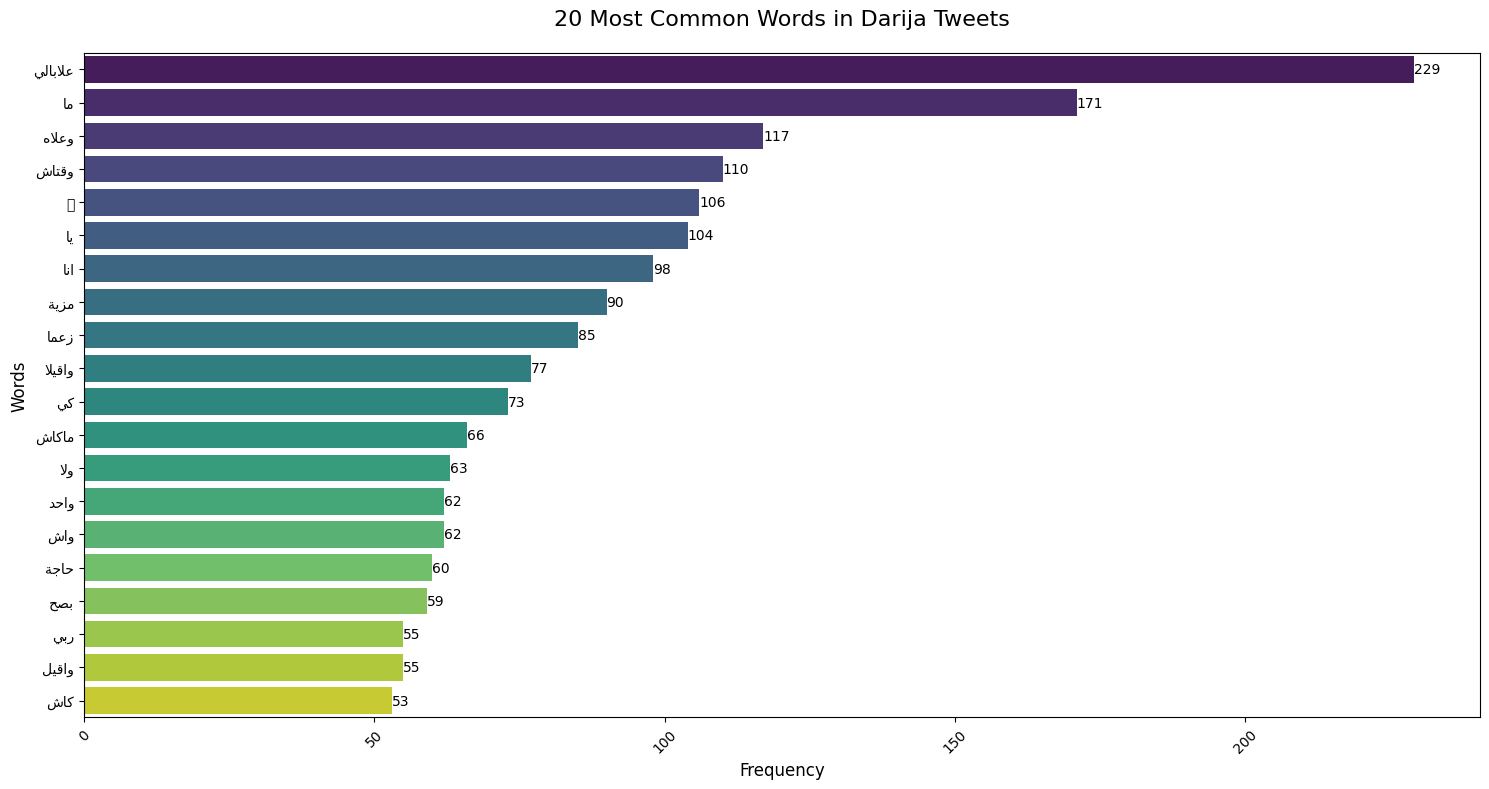

In [16]:
def plot_top_words(word_counts, n=20, title="Most Common Words"):
    """
    Create a bar plot of the most common words.
    Args:
        word_counts (Counter): Word frequency counter
        n (int): Number of top words to show
        title (str): Plot title
    """
    # Get top n words
    top_words = word_counts.most_common(n)
    words, counts = zip(*top_words)

    # Create figure
    plt.figure(figsize=(15, 8))

    # Reshape Arabic text for proper display
    reshaped_words = [arabic_reshaper.reshape(word) for word in words]
    bidi_words = [get_display(word) for word in reshaped_words]

    # Create bar plot
    sns.barplot(x=list(counts), y=bidi_words, palette="viridis")

    # Customize plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.xticks(rotation=45)

    # Add value labels on bars
    for i, count in enumerate(counts):
        plt.text(count, i, str(count), va='center')

    plt.tight_layout()
    plt.show()

# Create the visualization
print("Creating word frequency visualization...")
plot_top_words(word_counts, n=20, title="20 Most Common Words in Darija Tweets")

## 3. Word Cloud
A word cloud is a visual representation of text data where the size of each word indicates its frequency.

Generating word cloud...


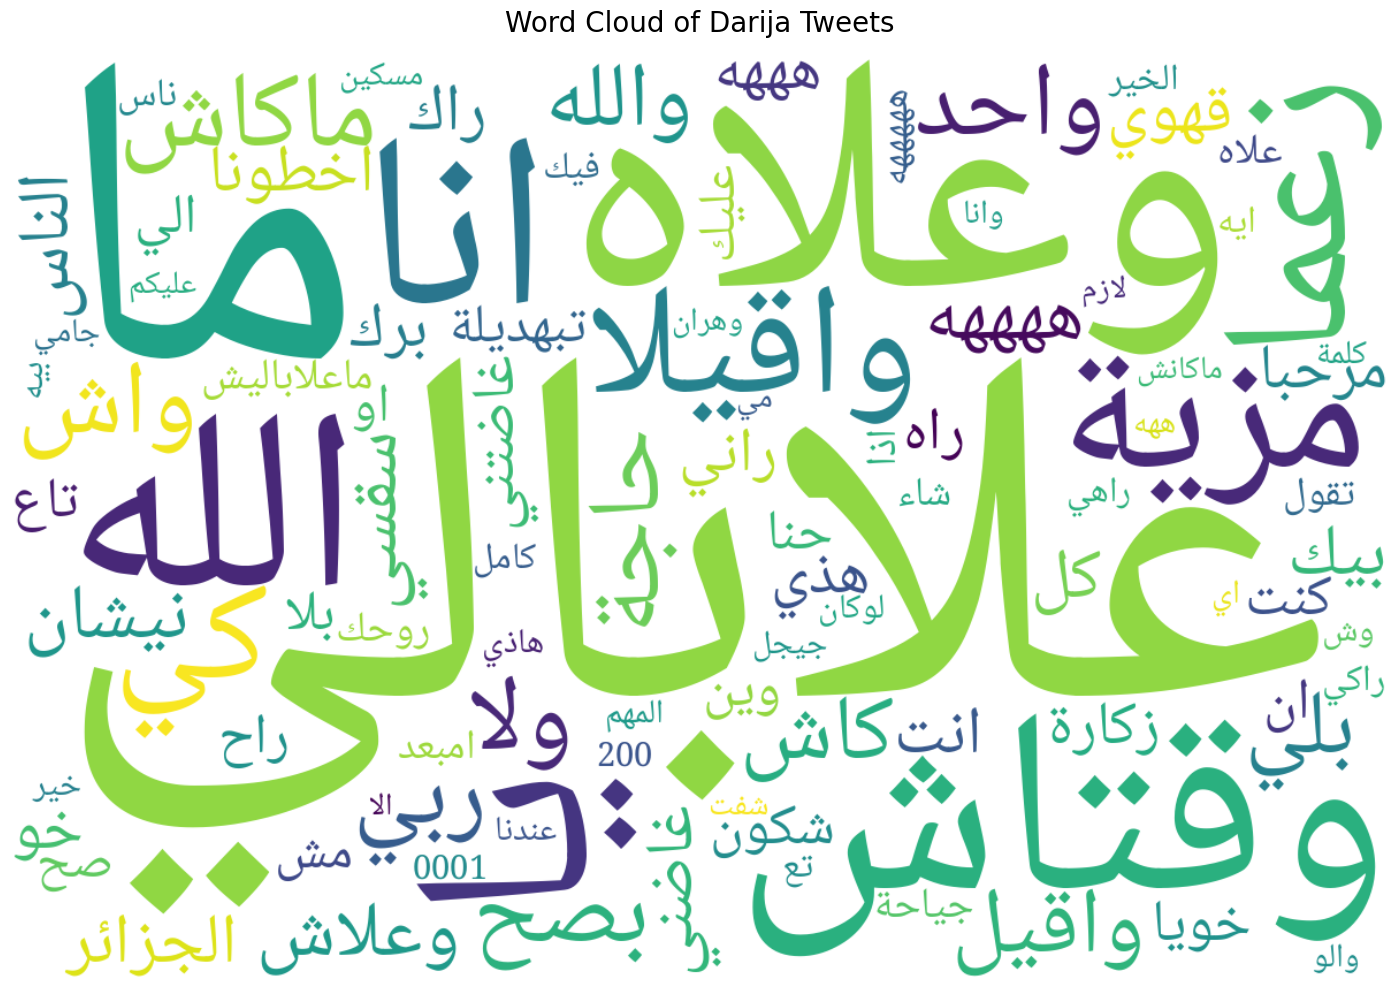

In [18]:
def create_word_cloud(word_counts, title="Word Cloud of Darija Tweets"):
    """
    Create a word cloud from word frequencies.
    Args:
        word_counts (Counter): Word frequency counter
        title (str): Plot title
    """
    # Create word cloud
    wordcloud = WordCloud(
        font_path='/content/NotoNaskhArabic-VariableFont_wght.ttf',
        background_color='white',
        width=1200,
        height=800,
        max_words=100,
        colormap='viridis'
    ).generate_from_frequencies(word_counts)

    # Create figure
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, pad=20)
    plt.tight_layout()
    plt.show()

# Generate word cloud
print("Generating word cloud...")
create_word_cloud(word_counts)

## 🎉 Congratulations!
You've successfully:
1. Cleaned a Darija tweet dataset
2. Removed unnecessary elements (emojis, usernames, etc.)
3. Analyzed word frequencies
4. Created visualizations

## 📝 Next Steps
- Try analyzing different subsets of the data
- Experiment with different visualization styles
- Explore sentiment analysis of the tweets
- Try creating bigrams or trigrams to find common phrases

## 💡 Challenge
Can you modify the code to:
1. Find the most common bigrams (pairs of words)?
2. Create a visualization of word frequencies by sentiment?
3. Compare word frequencies between different time periods?